<a href="https://colab.research.google.com/github/HuseynA28/FaceRecognitionMachineLearning/blob/main/PictureDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import os
from glob import glob
import pandas as pd
from PIL import Image

In [39]:
male_path = '/content/drive/MyDrive/FaceRecognition/OpenCV/data/save_pictures/male'
female_path = '/content/drive/MyDrive/FaceRecognition/OpenCV/data/save_pictures/female'

In [40]:


def read_image_data(male_path, female_path):
    # Use glob to find all jpg files in the specified directories
    male_photos = glob(os.path.join(male_path, '*.jpg'))
    female_photos = glob(os.path.join(female_path, '*.jpg'))
    def create_df(photo_paths, gender):
        data = []
        for path in photo_paths:
            size = os.path.getsize(path)

            with Image.open(path) as img:
                width, height = img.size

            image_info = {
                'Filename': os.path.basename(path),
                'Path': path,
                'Size': size,
                'Width': width,
                'Height': height,
                'Gender': gender
            }
            data.append(image_info)
        return pd.DataFrame(data)
    male_df = create_df(male_photos, 'Male')
    female_df = create_df(female_photos, 'Female')
    return male_df, female_df

In [41]:
male_df, female_df = read_image_data(male_path, female_path)

In [42]:
male_df.shape

(649, 6)

In [43]:
female_df.shape

(424, 6)

In [44]:
male_df.head()

,Filename,Path,Size,Width,Height,Gender
0,male_photo0.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,6043,111,111,Male
1,male_photo2.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,9136,114,114,Male
2,male_photo12.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,8940,145,145,Male
3,male_photo14.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,5296,93,93,Male
4,male_photo18.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,5466,86,86,Male


In [45]:
num_male = len(male_df)
num_female = len(female_df)
total = num_male + num_female
male_percentage = (num_male / total) * 100
female_percentage = (num_female / total) * 100
labels = 'Male', 'Female'
sizes = [male_percentage, female_percentage]
colors = ['blue', 'pink']
explode = (0.1, 0)

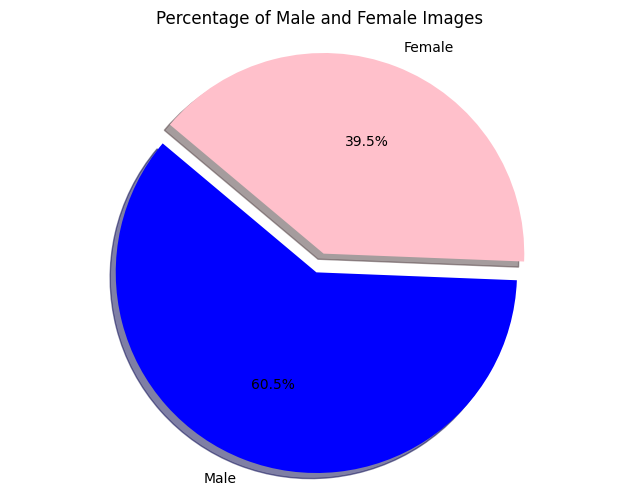

In [46]:
plt.figure(figsize=(8,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Male and Female Images')
plt.show()

In [47]:
male_path[0]

'/'

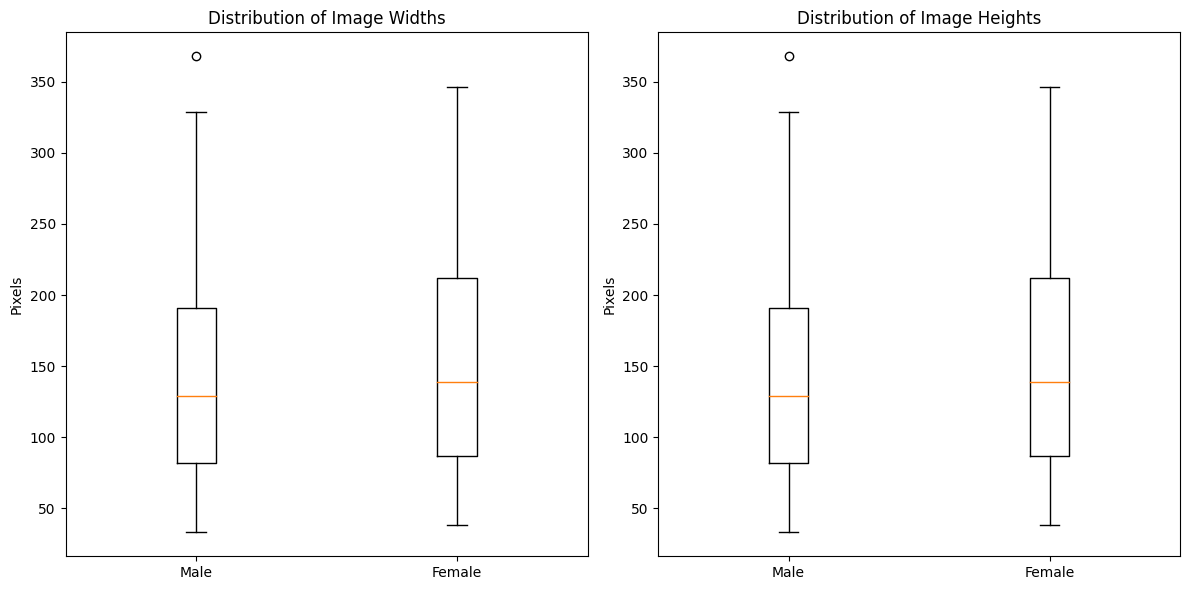

In [48]:
import matplotlib.pyplot as plt

def plot_boxplots(male_df, female_df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot([male_df['Width'], female_df['Width']], labels=['Male', 'Female'])
    plt.title('Distribution of Image Widths')
    plt.ylabel('Pixels')

    # Plot for Heights
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    plt.boxplot([male_df['Height'], female_df['Height']], labels=['Male', 'Female'])
    plt.title('Distribution of Image Heights')
    plt.ylabel('Pixels')

    plt.tight_layout()
    plt.show()
plot_boxplots(male_df, female_df)


In [49]:
def plot_size_distribution(male_df, female_df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(male_df['Size'], bins=20, color='blue', alpha=0.7, label='Male Heights')
    plt.title('Distribution of Male Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(female_df['Size'], bins=20, color='pink', alpha=0.7, label='Female Heights')
    plt.title('Distribution of Female Image Heights')
    plt.xlabel('Size')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

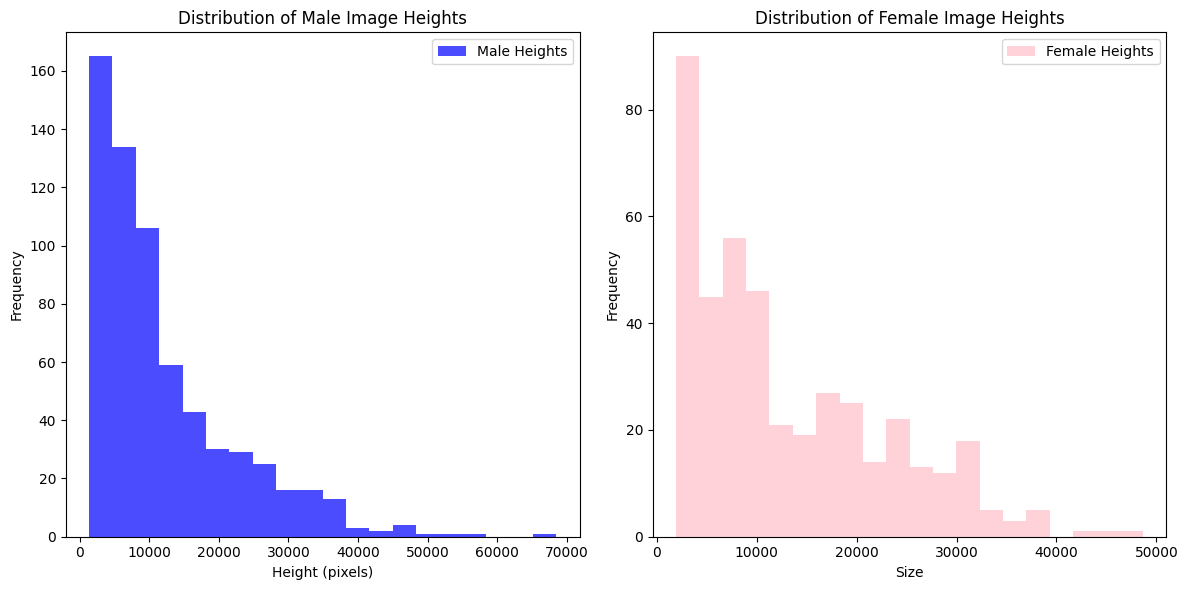

In [50]:

plot_size_distribution(male_df, female_df)

In [51]:
def plot_width_distribution(male_df, female_df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(male_df['Width'], bins=20, color='blue', alpha=0.7, label='Male Heights')
    plt.title('Distribution of Male Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(female_df['Width'], bins=20, color='pink', alpha=0.7, label='Female Heights')
    plt.title('Distribution of Female Image Heights')
    plt.xlabel('width (pixels)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()


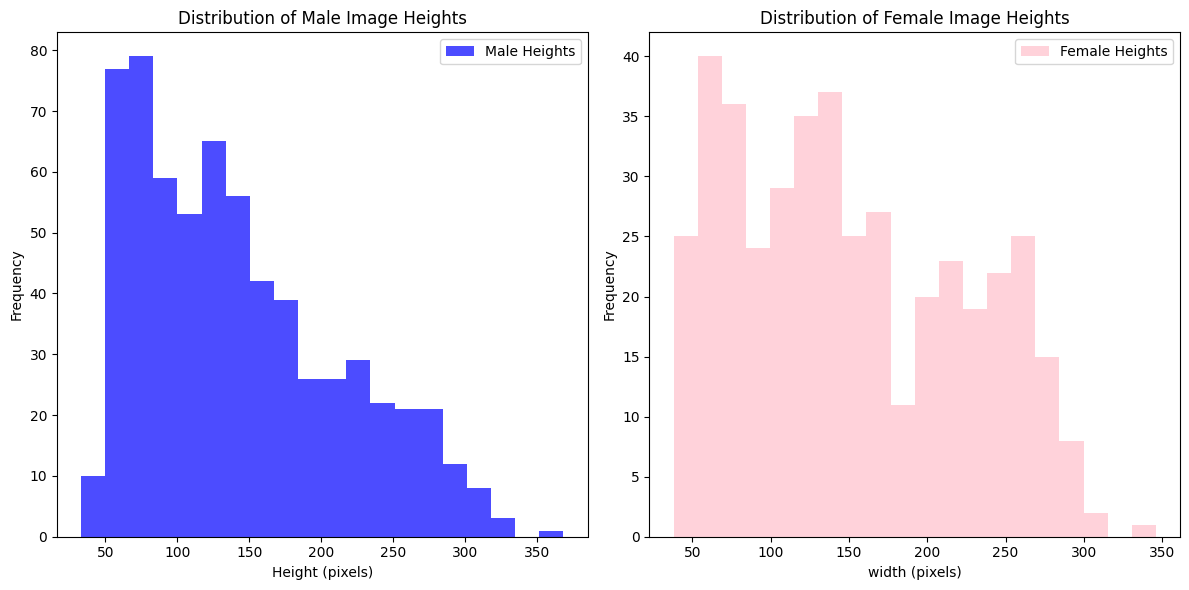

In [52]:

plot_width_distribution(male_df, female_df)

In [53]:
def plot_height_distribution(male_df, female_df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(male_df['Height'], bins=20, color='blue', alpha=0.7, label='Male Heights')
    plt.title('Distribution of Male Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.hist(female_df['Height'], bins=20, color='pink', alpha=0.7, label='Female Heights')
    plt.title('Distribution of Female Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()

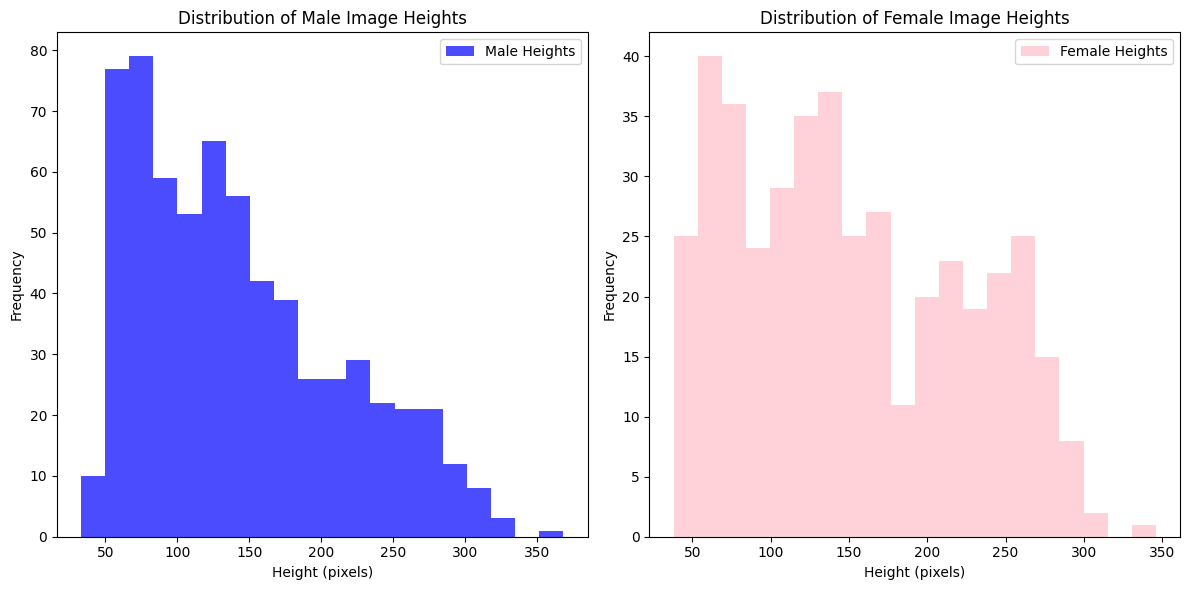

In [54]:

plot_height_distribution(male_df, female_df)

In [55]:

def filter_by_dimension(df):
    filtered_df = df[(df['Width'] < 350) & (df['Height'] < 300)]
    return filtered_df

filtered_male_df = filter_by_dimension(male_df)
filtered_female_df = filter_by_dimension(female_df)



In [56]:

# Check the filtered data
print("Filtered by Dimension - Male Images:", len(filtered_male_df))
print("Filtered by Dimension - Female Images:", len(filtered_female_df))

Filtered by Dimension - Male Images: 637
Filtered by Dimension - Female Images: 421


In [57]:
print("Orginal - Male Images:", len(male_df))
print("Orginal - Female Images:", len(female_df))

Orginal - Male Images: 649
Orginal - Female Images: 424


In [58]:
filtered_male_df.head()

,Filename,Path,Size,Width,Height,Gender
0,male_photo0.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,6043,111,111,Male
1,male_photo2.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,9136,114,114,Male
2,male_photo12.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,8940,145,145,Male
3,male_photo14.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,5296,93,93,Male
4,male_photo18.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,5466,86,86,Male


In [59]:
filtered_male_df['Path'][1]

'/content/drive/MyDrive/FaceRecognition/OpenCV/data/save_pictures/male/male_photo2.jpg'

In [60]:
img = cv2.imread(filtered_male_df['Path'][1])
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
size=gray.shape[0]
size

114

array([[[  0, 253,   0],
        [  0, 255,   2],
        [  4, 255,   2],
        ...,
        [  1, 254,   3],
        [  3, 255,   0],
        [  3, 255,   0]],

       [[  0, 255,   2],
        [  9, 249,  12],
        [ 25, 235,  28],
        ...,
        [ 60, 232,  30],
        [ 44, 238,  18],
        [ 38, 243,  14]],

       [[  0, 255,   1],
        [ 21, 233,  26],
        [ 21, 142,  32],
        ...,
        [104, 112,  12],
        [ 61, 136,   0],
        [ 96, 208,  37]],

       ...,

       [[  0, 254,   0],
        [ 29, 231,  40],
        [ 11, 106,  45],
        ...,
        [171, 150,  68],
        [115, 172,  39],
        [113, 210,  52]],

       [[  0, 255,   0],
        [ 19, 238,  28],
        [  0, 139,  25],
        ...,
        [120, 179,  45],
        [ 85, 198,  30],
        [ 76, 216,  31]],

       [[  0, 255,   0],
        [ 17, 243,  24],
        [ 46, 210,  68],
        ...,
        [109, 209,  50],
        [ 78, 218,  33],
        [ 66, 229,  30]]], dtype=uint8)
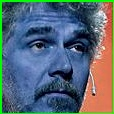

In [61]:
img

In [62]:
gray.shape

(114, 114)

In [63]:
def resize_data(path):
  img = cv2.imread(path)
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  size=gray.shape[0]
  if size >= 100:
    gray = cv2.resize(gray, (100, 100) ,cv2.INTER_AREA)
  else:
    gray = cv2.resize(gray, (100, 100), cv2.INTER_CUBIC)
  flatter_image = gray.flatten()
  return flatter_image

In [64]:
resize_data(filtered_male_df['Path'][1])

array([149, 150, 150, ..., 149, 147, 150], dtype=uint8)

In [65]:
filtered_male_df['data'] = filtered_male_df['Path'].apply(resize_data)

<ipython-input-65-9fe6221c3f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_male_df['data'] = filtered_male_df['Path'].apply(resize_data)


In [66]:
filtered_female_df['data'] = filtered_female_df['Path'].apply(resize_data)

<ipython-input-66-ff4493547beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_female_df['data'] = filtered_female_df['Path'].apply(resize_data)


In [67]:
df = pd.concat([filtered_female_df, filtered_male_df], axis=0)

data_df = df.sample(frac=1).reset_index(drop=True)

In [68]:
data_df.head()

,Filename,Path,Size,Width,Height,Gender,data
0,female_photo10.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,4712,71,71,Female,"[150, 150, 150, 149, 150, 151, 150, 149, 151, ..."
1,male_photo365.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,7842,100,100,Male,"[150, 150, 149, 149, 150, 150, 149, 151, 150, ..."
2,male_photo14.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,5296,93,93,Male,"[150, 148, 151, 150, 149, 149, 150, 150, 150, ..."
3,male_photo999.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,7473,112,112,Male,"[148, 151, 150, 150, 150, 150, 149, 150, 150, ..."
4,male_photo812.jpg,/content/drive/MyDrive/FaceRecognition/OpenCV/...,14116,149,149,Male,"[150, 150, 150, 149, 150, 149, 150, 151, 149, ..."


In [69]:
data =data_df["data"].apply(pd.Series)

In [71]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,150,150,150,149,150,151,150,149,151,151,...,151,152,152,151,149,149,153,149,147,147
1,150,150,149,149,150,150,149,151,150,150,...,148,150,149,147,154,152,150,150,153,150
2,150,148,151,150,149,149,150,150,150,150,...,150,149,147,148,151,152,149,151,151,149
3,148,151,150,150,150,150,149,150,150,150,...,148,146,147,146,147,150,149,150,151,150
4,150,150,150,149,150,149,150,151,149,151,...,169,170,169,172,171,168,169,168,167,155


In [81]:
data.max().max()

255

In [87]:
data = data/data.max().max()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.588235,0.588235,0.588235,0.584314,0.588235,0.592157,0.588235,0.584314,0.592157,0.592157,...,0.592157,0.596078,0.596078,0.592157,0.584314,0.584314,0.600000,0.584314,0.576471,0.576471
1,0.588235,0.588235,0.584314,0.584314,0.588235,0.588235,0.584314,0.592157,0.588235,0.588235,...,0.580392,0.588235,0.584314,0.576471,0.603922,0.596078,0.588235,0.588235,0.600000,0.588235
2,0.588235,0.580392,0.592157,0.588235,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235,...,0.588235,0.584314,0.576471,0.580392,0.592157,0.596078,0.584314,0.592157,0.592157,0.584314
3,0.580392,0.592157,0.588235,0.588235,0.588235,0.588235,0.584314,0.588235,0.588235,0.588235,...,0.580392,0.572549,0.576471,0.572549,0.576471,0.588235,0.584314,0.588235,0.592157,0.588235
4,0.588235,0.588235,0.588235,0.584314,0.588235,0.584314,0.588235,0.592157,0.584314,0.592157,...,0.662745,0.666667,0.662745,0.674510,0.670588,0.658824,0.662745,0.658824,0.654902,0.607843


In [89]:
data["Gender"] = data_df["Gender"]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Gender
0,0.588235,0.588235,0.588235,0.584314,0.588235,0.592157,0.588235,0.584314,0.592157,0.592157,...,0.596078,0.596078,0.592157,0.584314,0.584314,0.600000,0.584314,0.576471,0.576471,Female
1,0.588235,0.588235,0.584314,0.584314,0.588235,0.588235,0.584314,0.592157,0.588235,0.588235,...,0.588235,0.584314,0.576471,0.603922,0.596078,0.588235,0.588235,0.600000,0.588235,Male
2,0.588235,0.580392,0.592157,0.588235,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235,...,0.584314,0.576471,0.580392,0.592157,0.596078,0.584314,0.592157,0.592157,0.584314,Male
3,0.580392,0.592157,0.588235,0.588235,0.588235,0.588235,0.584314,0.588235,0.588235,0.588235,...,0.572549,0.576471,0.572549,0.576471,0.588235,0.584314,0.588235,0.592157,0.588235,Male
4,0.588235,0.588235,0.588235,0.584314,0.588235,0.584314,0.588235,0.592157,0.584314,0.592157,...,0.666667,0.662745,0.674510,0.670588,0.658824,0.662745,0.658824,0.654902,0.607843,Male


In [92]:
import pickle
pickle.dump(data, open("/content/drive/MyDrive/FaceRecognition/OpenCV/data/data_image_pixel.pickle", "wb"))